##### Model Training

#### 1.1 Import Data and Required Packages

##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warnings Library.

In [2]:
!pip install catboost

In [3]:
# Basic Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Modelling
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV  # ✅ FIXED
from catboost import CatBoostRegressor  # ✅ FIXED
from xgboost import XGBRFRegressor
import warnings


In [4]:
df = pd.read_csv('data/stud.csv')

In [5]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Preparing X and Y variables

In [6]:
# X independent features

X = df.drop(columns=['math_score'], axis=1)

In [7]:
y = df['math_score']

In [8]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import  ColumnTransformer

numeric_transfomer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transfomer, num_features ),
        ]
)





In [9]:
X = preprocessor.fit_transform(X)

In [10]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

In [12]:
X_train.shape

(800, 19)

#### Create an Evaluate Function to give all metrics after model Training 

In [13]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [14]:
models={
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridege": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRFRegressor": XGBRFRegressor(),
    "CatBoostRegressor": CatBoostRegressor(),
    "AdaBoostRegressor": AdaBoostRegressor()

}
model_list = []
r2_list = []
for i in range(len(list(models))):
     model = list(models.values())[i]
     model.fit(X_train, y_train) # Train model

     # Make Predictions
     y_train_pred = model.predict(X_train)
     y_test_pred = model.predict(X_test)

     # Evaluate Train and Test dataset
     model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
     model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

     print(list(models.keys())[i])
     model_list.append(list(models.keys())[i])

     print('Model performance for Training set')
     print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
     print("- R2 Score: {:.4f}".format(model_train_r2))

     print('--------------------------------------')

     print("Model performance for Test set")

     print('Model performance for Test set')
     print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
     print("- R2 Score: {:.4f}".format(model_test_r2))
     r2_list.append(model_test_r2)

     print('='*35)
     print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.2761
- R2 Score: 0.8796
--------------------------------------
Model performance for Test set
Model performance for Test set
- Root Mean Squared Error: 5.5396
- R2 Score: 0.8625


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.4936
- R2 Score: 0.8177
--------------------------------------
Model performance for Test set
Model performance for Test set
- Root Mean Squared Error: 6.5424
- R2 Score: 0.8082


Ridege
Model performance for Training set
- Root Mean Squared Error: 5.2763
- R2 Score: 0.8796
--------------------------------------
Model performance for Test set
Model performance for Test set
- Root Mean Squared Error: 5.5410
- R2 Score: 0.8625


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.7061
- R2 Score: 0.8592
--------------------------------------
Model performance for Test set
Model performance for Test set
- Root Mean Squared Error:

#### Results


In [16]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending =False)

,Model Name,R2_Score
0,Linear Regression,0.862527
2,Ridege,0.862454
7,CatBoostRegressor,0.827214
6,XGBRFRegressor,0.825927
5,Random Forest Regressor,0.817273
1,Lasso,0.808249
8,AdaBoostRegressor,0.793416
3,K-Neighbors Regressor,0.774602
4,Decision Tree,0.661410


#### Linear Regression

In [17]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print("Accuracy of the model is %.2f"%score)

Accuracy of the model is 86.25


#### Plot y_pred and y_test

Text(0, 0.5, 'Predicted')

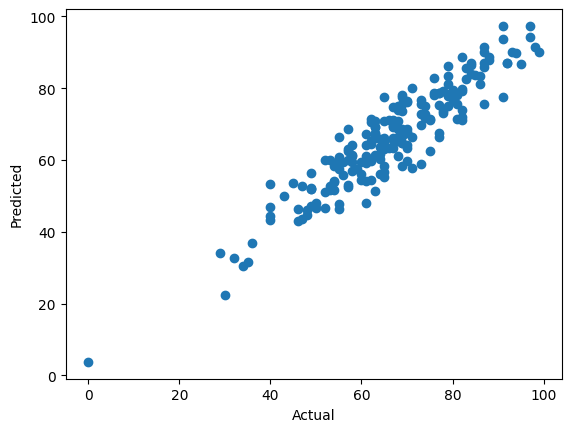

In [18]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='math_score'>

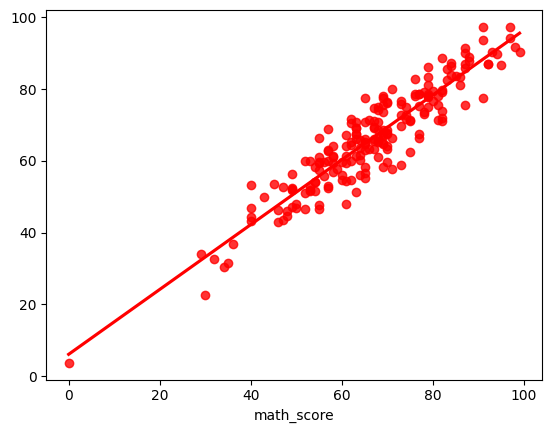

In [19]:
sns.regplot(x=y_test, y = y_pred, ci= None, color='red')

#### Difference between Actal and Predicted Values

In [20]:
pred_df = pd.DataFrame({'Actual Value':y_test, 'Predicted Value': y_pred, 'Difference': y_test-y_pred})

pred_df

,Actual Value,Predicted Value,Difference
890,86,83.482779,2.517221
694,49,51.902578,-2.902578
798,69,67.336689,1.663311
147,73,69.622232,3.377768
858,52,50.993922,1.006078
...,...,...,...
150,62,71.543858,-9.543858
279,73,58.822703,14.177297
544,64,56.091990,7.908010
568,63,51.414207,11.585793
